<a href="https://colab.research.google.com/github/AdrianCobo/Deep-Learning-And-Artificial-Intelligence/blob/main/Lesson_03_Pytorch_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [24]:
# we sould like to generate 20 data points
N = 20

# random data on the x-axis in (-5, +5)
X = np.random.random(N)*10 - 5

# a line plus some noise
Y = 0.5 * X - 1 + np.random.randn(N)

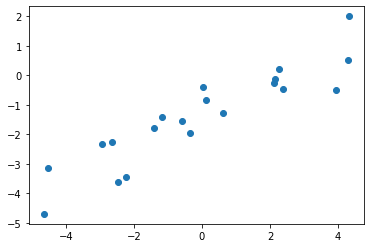

In [25]:
# Plot the data 
plt.scatter(X,Y);

In [26]:
# create the linear regression model
model = nn.Linear(1,1)

In [27]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.1)

In [28]:
# In ML we want our data to be of shape:
# (num_samples x num_dimensions)
X = X.reshape(N,1)
Y = Y.reshape(N,1)

# PyTorch uses float32 by default
# Numpy create float64 by default
inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

In [29]:
type(inputs)

torch.Tensor

In [30]:
# Train the model
n_epochs = 30
losses = []
for it in range(n_epochs):
  # zero the parameter gradients
  optimizer.zero_grad()
  
  # Forward pass
  outputs = model(inputs)
  loss = criterion(outputs, targets)

  # Keep the loss so we can plot it later
  losses.append(loss.item())

  # Backward and optimize
  loss.backward()
  optimizer.step()
  print(f'Epoch {it+1}/{n_epochs}, Loss: {loss.item():.4f}')

Epoch 1/30, Loss: 1.0521
Epoch 2/30, Loss: 0.7125
Epoch 3/30, Loss: 0.5838
Epoch 4/30, Loss: 0.5198
Epoch 5/30, Loss: 0.4825
Epoch 6/30, Loss: 0.4595
Epoch 7/30, Loss: 0.4449
Epoch 8/30, Loss: 0.4356
Epoch 9/30, Loss: 0.4296
Epoch 10/30, Loss: 0.4258
Epoch 11/30, Loss: 0.4234
Epoch 12/30, Loss: 0.4218
Epoch 13/30, Loss: 0.4208
Epoch 14/30, Loss: 0.4202
Epoch 15/30, Loss: 0.4198
Epoch 16/30, Loss: 0.4195
Epoch 17/30, Loss: 0.4193
Epoch 18/30, Loss: 0.4192
Epoch 19/30, Loss: 0.4192
Epoch 20/30, Loss: 0.4191
Epoch 21/30, Loss: 0.4191
Epoch 22/30, Loss: 0.4191
Epoch 23/30, Loss: 0.4191
Epoch 24/30, Loss: 0.4191
Epoch 25/30, Loss: 0.4191
Epoch 26/30, Loss: 0.4190
Epoch 27/30, Loss: 0.4190
Epoch 28/30, Loss: 0.4190
Epoch 29/30, Loss: 0.4190
Epoch 30/30, Loss: 0.4190


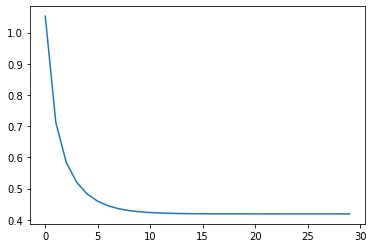

In [31]:
plt.plot(losses);

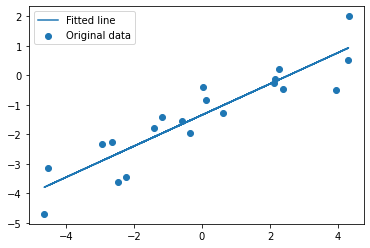

In [32]:
# Plot the graph
predicted = model(inputs).detach().numpy()
plt.scatter(X, Y, label='Original data')
plt.plot(X, predicted, label='Fitted line')
plt.legend()
plt.show()

In [33]:
# Another way
with torch.no_grad():
  out = model(inputs).numpy()
out

array([[-0.08579409],
       [-0.2024082 ],
       [-3.7946548 ],
       [ 0.7424773 ],
       [ 0.93324006],
       [-1.0208517 ],
       [-1.2843187 ],
       [-1.967594  ],
       [-2.5264955 ],
       [-2.652929  ],
       [-3.7305107 ],
       [-1.5242655 ],
       [-2.087653  ],
       [-2.9039166 ],
       [-1.6524708 ],
       [ 0.92679894],
       [-0.22476256],
       [-1.3239965 ],
       [-2.7392533 ],
       [-0.14185071]], dtype=float32)

In [34]:
# Important!
# In order to test the efficacy of our model, synthetic data is useful
# Why?
# Because ***we know the answer***
# True values of (w, b) are (0.5, -1)
w = model.weight.data.numpy()
b = model.bias.data.numpy()
print(w,b)

[[0.52876985]] [-1.3435329]
